<a href="https://colab.research.google.com/github/crispitagorico/Neural-SPDEs/blob/main/data/data_generation_ginzburg_landau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1>Data generator for the Ginzburg Landau equation</h1> </center>

*The Stochastic Ginzburg-Landau equation is also known as the Allen-Cahn equation in 1-dimension and is used for modeling various physical phenomena like superconductivity.*

*In this notebook we generate solutions of the stochastic Ginzburg-Ladau equations,*
\begin{align*}
    \partial_t u - \Delta u &= 3u -u^3 + \xi,  \\
    u(t,0) &= u(t,1),  \nonumber\\
    u(0,x) &= u_0(x), \quad (t,x)\in [0,T]\times[0,1] \nonumber
\end{align*}
*with the initial condition $u_0$ either being fixed across samples, or varying.*
***

In [ ]:
!git clone "https://github.com/andrisger/Feature-Engineering-with-Regularity-Structures.git"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

In [ ]:
%run Feature-Engineering-with-Regularity-Structures/Classes/SPDEs.ipynb
%run Feature-Engineering-with-Regularity-Structures/Classes/Noise.ipynb

# Dataset $\xi\to u$

We sample multiple paths $\xi^1, \ldots, \xi^n$ from a cylindrical Wiener process in one dimension, and then solve the
SPDE. The initial condition $u_0$ is kept fixed across the $n$ samples, and $u_0(x)=x(1-x)$. 

In [ ]:
n = 1200 # number of solutions
dx, dt = 1./128, 1./1000 # space-time increments 
a, b, s, t = 0, 1, 0, 0.05 # space-time boundaries

In [ ]:
ic = lambda x: x*(1-x) # initial condition
mu = lambda x: 3*x-x**3 # drift
sigma = lambda x: 1 # additive diffusive term

In [ ]:
O_X, O_T = Noise().partition(a,b,dx), Noise().partition(s,t,dt) # space grid O_X and time grid O_T
W = Noise().WN_space_time_many(s, t, dt, a, b, dx, n) # create realizations of space time white noise
Soln_add = SPDE(BC = 'P', IC = ic, mu = mu, sigma = sigma).Parabolic(0.1*W, O_T, O_X) # solve parabolic equation

In [ ]:
W = W.transpose(0,2,1)
soln = Soln_add.transpose(0,2,1)

In [ ]:
scipy.io.savemat('drive/MyDrive/Phi41+/Phi41+_xi_{}.mat'.format(n), mdict={'X':O_X, 'T':O_T, 'W': W, 'sol': soln})

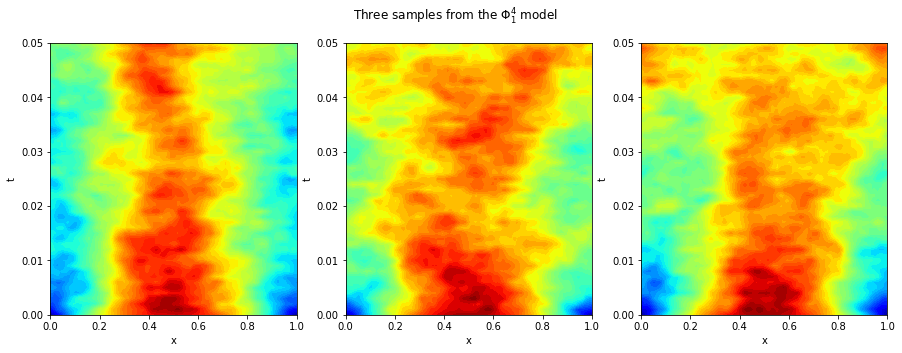

In [ ]:
x_m, t_m = np.meshgrid(O_T, O_X)

fig, ax = plt.subplots(1,3,figsize=(15,5))

for i in range(3):
  ax[i].contourf(t_m, x_m, soln[i,:,:], 50, cmap=plt.cm.jet)
  ax[i].set_xlabel('x')
  ax[i].set_ylabel('t')
plt.suptitle(r'Three samples from the $\Phi^4_1$ model')
plt.show()

# Dataset $(u_0,\xi)\to u$

We sample multiple paths $\xi^1, \ldots, \xi^n$ from a cylindrical Wiener process in one dimension. We sample the initial condition $u_0^1, \ldots, u_0^n$ and then solve the
SPDE for each $(u_0^i,\xi^i)$.

In [ ]:
n = 1200 # number of solutions
dx, dt = 1./128, 1./1000 # space-time increments 
a, b, s, t = 0, 1, 0, 0.05 # space-time boundaries

In [ ]:
ic = lambda x: x*(1-x) # initial condition
mu = lambda x: 3*x-x**3 # drift
sigma = lambda x: 1 # additive diffusive term

X_ = np.linspace(-0.5,0.5,129)
ic_ = Noise().initial(n, X_, scaling = 1) # one cycle
ic = 0.1*(ic_-ic_[:,0,None]) + ic(O_X)

In [ ]:
O_X, O_T = Noise().partition(a,b,dx), Noise().partition(s,t,dt) # space grid O_X and time grid O_T
W = Noise().WN_space_time_many(s, t, dt, a, b, dx, n) # create realizations of space time white noise
Soln_add = SPDE(BC = 'P', IC = ic, mu = mu, sigma = sigma).Parabolic(0.1*W, O_T, O_X) # solve parabolic equation

In [ ]:
W = W.transpose(0,2,1)
soln = Soln_add.transpose(0,2,1)

In [ ]:
scipy.io.savemat('drive/MyDrive/Phi41+/Phi41+_xi_u0{}.mat'.format(n), mdict={'X':O_X, 'T':O_T, 'W': W, 'sol': soln})

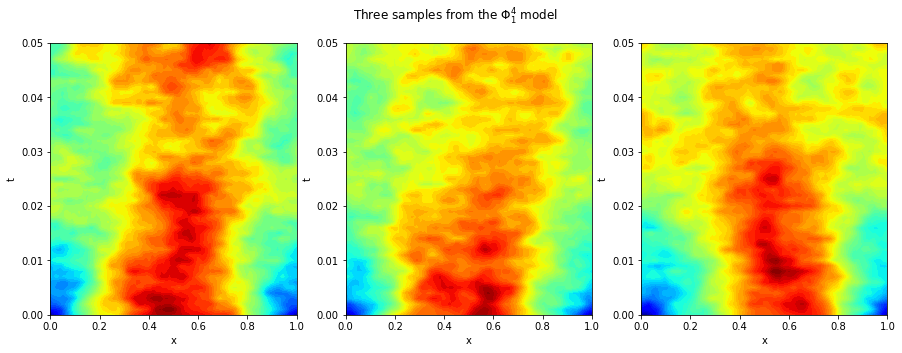

In [ ]:
x_m, t_m = np.meshgrid(O_T, O_X)

fig, ax = plt.subplots(1,3,figsize=(15,5))

for i in range(3):
  ax[i].contourf(t_m, x_m, soln[i,:,:], 50, cmap=plt.cm.jet)
  ax[i].set_xlabel('x')
  ax[i].set_ylabel('t')
plt.suptitle(r'Three samples from the $\Phi^4_1$ model')
plt.show()

# Super-resolution dataset

In [ ]:
n = 200 # number of solutions
dx, dt = 1./512, 1./1000 # space-time increments 
a, b, s, t = 0, 1, 0, 0.05 # space-time boundaries

In [ ]:
ic = lambda x: x*(1-x) # initial condition
mu = lambda x: 3*x-x**3 # drift
sigma = lambda x: 1 # additive diffusive term

X_ = np.linspace(-0.5,0.5,513)
ic_ = Noise().initial(n, X_, scaling = 1) # one cycle
ic = 0.1*(ic_-ic_[:,0,None]) + ic(O_X)

In [ ]:
O_X, O_T = Noise().partition(a,b,dx), Noise().partition(s,t,dt) # space grid O_X and time grid O_T
W = Noise().WN_space_time_many(s, t, dt, a, b, dx, n) # create realizations of space time white noise
Soln_add = SPDE(BC = 'P', IC = ic, mu = mu, sigma = sigma).Parabolic(0.1*W, O_T, O_X) # solve parabolic equation

In [ ]:
W = W.transpose(0,2,1)
soln = Soln_add.transpose(0,2,1)

In [ ]:
scipy.io.savemat('drive/MyDrive/Phi41+_xi_u0/Phi41+_super_xi_u0_{}.mat'.format(n), mdict={'X':O_X, 'T':O_T, 'W': W, 'sol': soln})

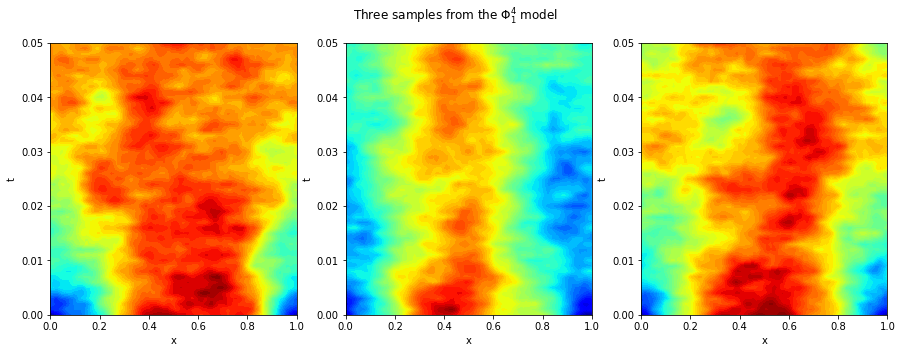

In [ ]:
x_m, t_m = np.meshgrid(O_T, O_X)

fig, ax = plt.subplots(1,3,figsize=(15,5))

for i in range(3):
  ax[i].contourf(t_m, x_m, soln[i,:,:], 50, cmap=plt.cm.jet)
  ax[i].set_xlabel('x')
  ax[i].set_ylabel('t')
plt.suptitle(r'Three samples from the $\Phi^4_1$ model')
plt.show()